# Geo/Geo/1 queue

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def geo_geo1_queue(mu,lamda,T):
    queue = []
    q_t = [0]
    for t in range(1,T+1):
        if np.random.rand() < lamda:
            arrival = 1
        else:
            arrival = 0
        if np.random.rand() < mu:
            service = 1
        else:
            service = 0
        q_t.append(max(q_t[t-1] + arrival - service,0))
            
    avg_queue_len = sum(q_t)/T
   
    return avg_queue_len

# def geogeo1(mu,lamda,T):
#     queue = []
#     server_busy = False
#     q_t = []
# #     arrival_times = []
# #     served_times = []
# #     D_soj = []
    
#     for t in range(T):
#         if random.random()<lamda:     # implementing Ber(lamda) RV
#             queue.append(1)
# #             arrival_times.append(t)
        
#         if queue and not server_busy:
#             if random.random()<mu:
#                 queue.pop(0)
#                 server_busy = True
# #                 served_times.append(t)
#         if server_busy:
#             if random.random()<mu:
#                 server_busy = False
#         q_t.append(len(queue))
#     avg_q_len = sum(q_t)/T
# #         if len(arrival_times)>=N and len(served_times)>=N:
# #             D_soj = [served_times[i] - arrival_times[i] for i in range(N)] 
# #             avg_soj_time = sum(D_soj)/N
# #             return avg_soj_time
#     return avg_q_len

In [4]:
mu = 0.9
lamda_val = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.89,1.0]
q_len_val = []
for lam in lamda_val:
    q_len_val.append(geo_geo1_queue(mu,lam,100000))

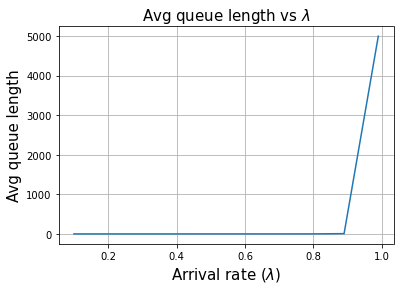

In [18]:
plt.plot(lamda_val,q_len_val)
# plt.xlim(0.1,0.9)
# plt.ylim(0.0,0.8)
plt.grid()
plt.xlabel('Arrival rate ($\lambda$)',size=15)
plt.ylabel('Avg queue length',size=15)
plt.title("Avg queue length vs $\lambda$",size=15)
plt.show()

In [11]:
# Comparison with pi*P = pi Stationary distribution result

In [14]:
def stationary_dist(mu,lam):
    p = lam*(1-mu)/(mu*(1-lam))
    exp_len = p/(1-p)
    return exp_len

In [22]:
mu = 0.9
lamda_val = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.89999,0.99]
exp_len_val = []
for lam in lamda_val:
    exp_len_val.append(stationary_dist(mu,lam))

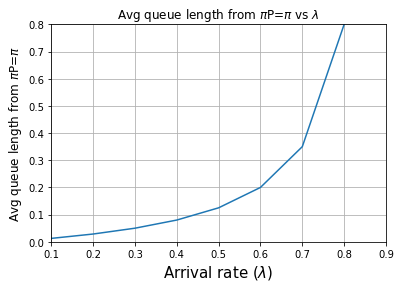

In [26]:
plt.plot(lamda_val,exp_len_val)
plt.xlim(0.1,0.9)
plt.ylim(0.0,0.8)
plt.grid()
plt.xlabel('Arrival rate ($\lambda$)',size=15)
plt.ylabel('Avg queue length from $\pi$P=$\pi$',size=12)
plt.title("Avg queue length from $\pi$P=$\pi$ vs $\lambda$",size=12)
plt.show()

### Sojourn time vs lambda

In [7]:
def sojourn_time(mu,lamda,T):
    queue = []
    arrival_times = []
    served_times = []
    D_soj = []
    q_t = [0]
    for t in range(1,T+1):
        if np.random.rand() < lamda:
            arrival = 1
            arrival_times.append(t)
        else:
            arrival = 0
        if np.random.rand() < mu:
            service = 1
        else:
            service = 0
        q_t.append(max(q_t[t-1] + arrival - service,0))
        if (service == 1 and (q_t[t-1]!=0 or arrival == 1)):
            served_times.append(t)
        
    D_soj = [(served_times[i] - arrival_times[i]) for i in range(len(served_times))]
    avg_soj_time = sum(D_soj)/(len(served_times))
    return avg_soj_time
    
            

In [8]:
mu = 0.9
lamda_val = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.89,1.0]
soj_time_val = []
for lam in lamda_val:
    soj_time_val.append(sojourn_time(mu,lam,100000))


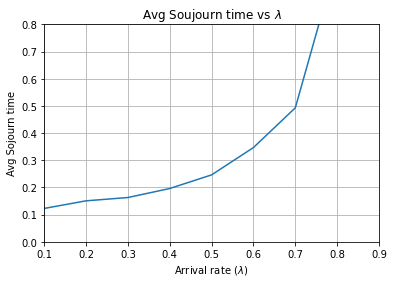

In [10]:
plt.plot(lamda_val,soj_time_val)
plt.xlim(0.1,0.9)
plt.ylim(0.0,0.8)
plt.xlabel('Arrival rate ($\lambda$)')
plt.ylabel('Avg Sojourn time')
plt.title("Avg Soujourn time vs $\lambda$")
plt.grid(True)
plt.show()

In [47]:
# def ratioLenWait(mu,lamda,T,N):
#     queue = []
#     server_busy = False
#     q_t = []
#     arrival_times = []
#     served_times = []
#     D_soj = []
    
#     for t in range(T):
#         if random.random()<lamda:     # implementing Ber(lamda) RV
#             queue.append(1)
#             arrival_times.append(t)
        
#         if queue and not server_busy:
#             if random.random()<mu:
#                 queue.pop(0)
#                 server_busy = True
#                 served_times.append(t)
#         if server_busy:
#             if random.random()<mu:
#                 server_busy = False
#         q_t.append(len(queue))
#         if len(arrival_times)>=N and len(served_times)>=N:
#             D_soj = [served_times[i] - arrival_times[i] for i in range(N)] 
#             avg_soj_time = sum(D_soj)/N
#             avg_queue_len = sum(q_t)/T
#             return (avg_queue_len / avg_soj_time)
#     return None

In [48]:
len_waittime_ratio = []

for lam in lamda_val:
    len_waittime_ratio.append(geo_geo1_queue(mu,lam,100000)/sojourn_time(mu,lam,100000))

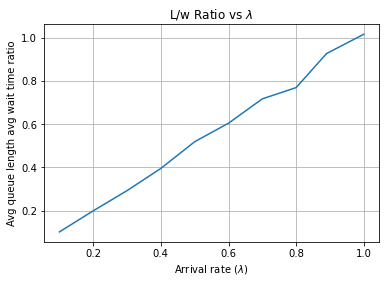

In [49]:
plt.plot(lamda_val,len_waittime_ratio)
plt.xlabel('Arrival rate ($\lambda$)')
plt.ylabel('Avg queue length avg wait time ratio')
plt.title("L/w Ratio vs $\lambda$")
plt.grid(True)
plt.show()